# MNIST - Categorical Classification
> # Dropout
## Import Tensorflow & Keras

In [1]:
import warnings
warnings.filterwarnings('ignore')

* import Keras

In [2]:
import keras

keras.__version__

'2.4.3'

# I. MNIST Data_Set Load

In [3]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


# II. Data Preprocessing

> ## 1) Reshape and Normalization

* reshape

In [4]:
X_train = X_train.reshape((60000, 28 * 28))
X_test = X_test.reshape((10000, 28 * 28))

* Normalization

In [5]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

> ## 2) One Hot Encoding

In [6]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# III. MNIST Keras Modeling

> ## 1) Model Define

* 모델 신경망 구조 정의
 - 2개의 Hidden Layers & 768개의 Nodes
 - Model Capacity는 기존과 동일
 - Dropout Layers 적용

In [7]:
from keras import models
from keras import layers

mnist = models.Sequential()
mnist.add(layers.Dense(512, activation = 'relu', input_shape=(28 * 28,)))
mnist.add(layers.Dropout(0.4))
mnist.add(layers.Dense(256, activation = 'relu'))
mnist.add(layers.Dropout(0.2))
mnist.add(layers.Dense(10, activation = 'softmax'))

* 모델 구조 확인

In [8]:
mnist.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


> ## 2) Model Compile

* 모델 학습방법 설정

In [9]:
mnist.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

> ## 3) Model Fit

* 약 3분

In [10]:
%%time

Hist_mnist = mnist.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 5s 4ms/step - loss: 0.5347 - accuracy: 0.8320 - val_loss: 0.1287 - val_accuracy: 0.9616
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 0.1526 - accuracy: 0.9543 - val_loss: 0.1055 - val_accuracy: 0.9676
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 0.1106 - accuracy: 0.9664 - val_loss: 0.0930 - val_accuracy: 0.9720
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0929 - accuracy: 0.9726 - val_loss: 0.0840 - val_accuracy: 0.9762
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0794 - accuracy: 0.9749 - val_loss: 0.0918 - val_accuracy: 0.9759
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0687 - accuracy: 0.9793 - val_loss: 0.0886 - val_accuracy: 0.9763
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0642 - accuracy: 0.9804 - val_loss: 0.0899 - val_accuracy: 0.9771

> ## 4) 학습 결과 시각화

* Loss Visualization

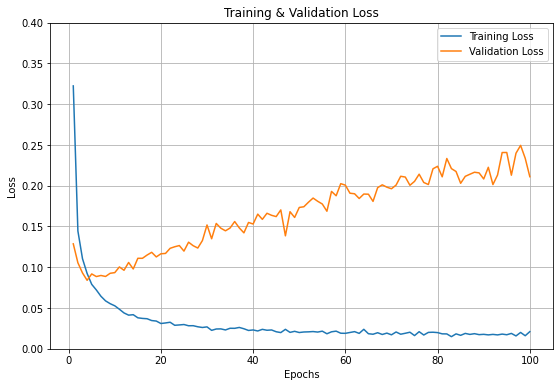

In [11]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
plt.ylim(0, 0.4)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

In [12]:
loss, accuracy = mnist.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.1926 - accuracy: 0.9849
Loss = 0.19264
Accuracy = 0.98490


# 
# 
# 
# The End
# 
# 
# 